<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/p_47_p_60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 2. 퍼셉트론**

In [ ]:
# 퍼셉트론: 다수의 신호를 입력으로 받아 하나의 신호를 출력합니다.
# 신호: 전류나 강물처럼 흐름이 있는 것을 상상하면 좋습니다.
# 전류가 전선을 타고 흐르는 전자를 내보내듯, 퍼셉트론 신호도 흐름을 만들고 정보를 앞으로 전달합니다.

# 실제 전류와 달리 퍼셉트론 신호는 '흐른다/안 흐른다(1이나 0)'의 두 가지 값을 가질 수 있습니다.

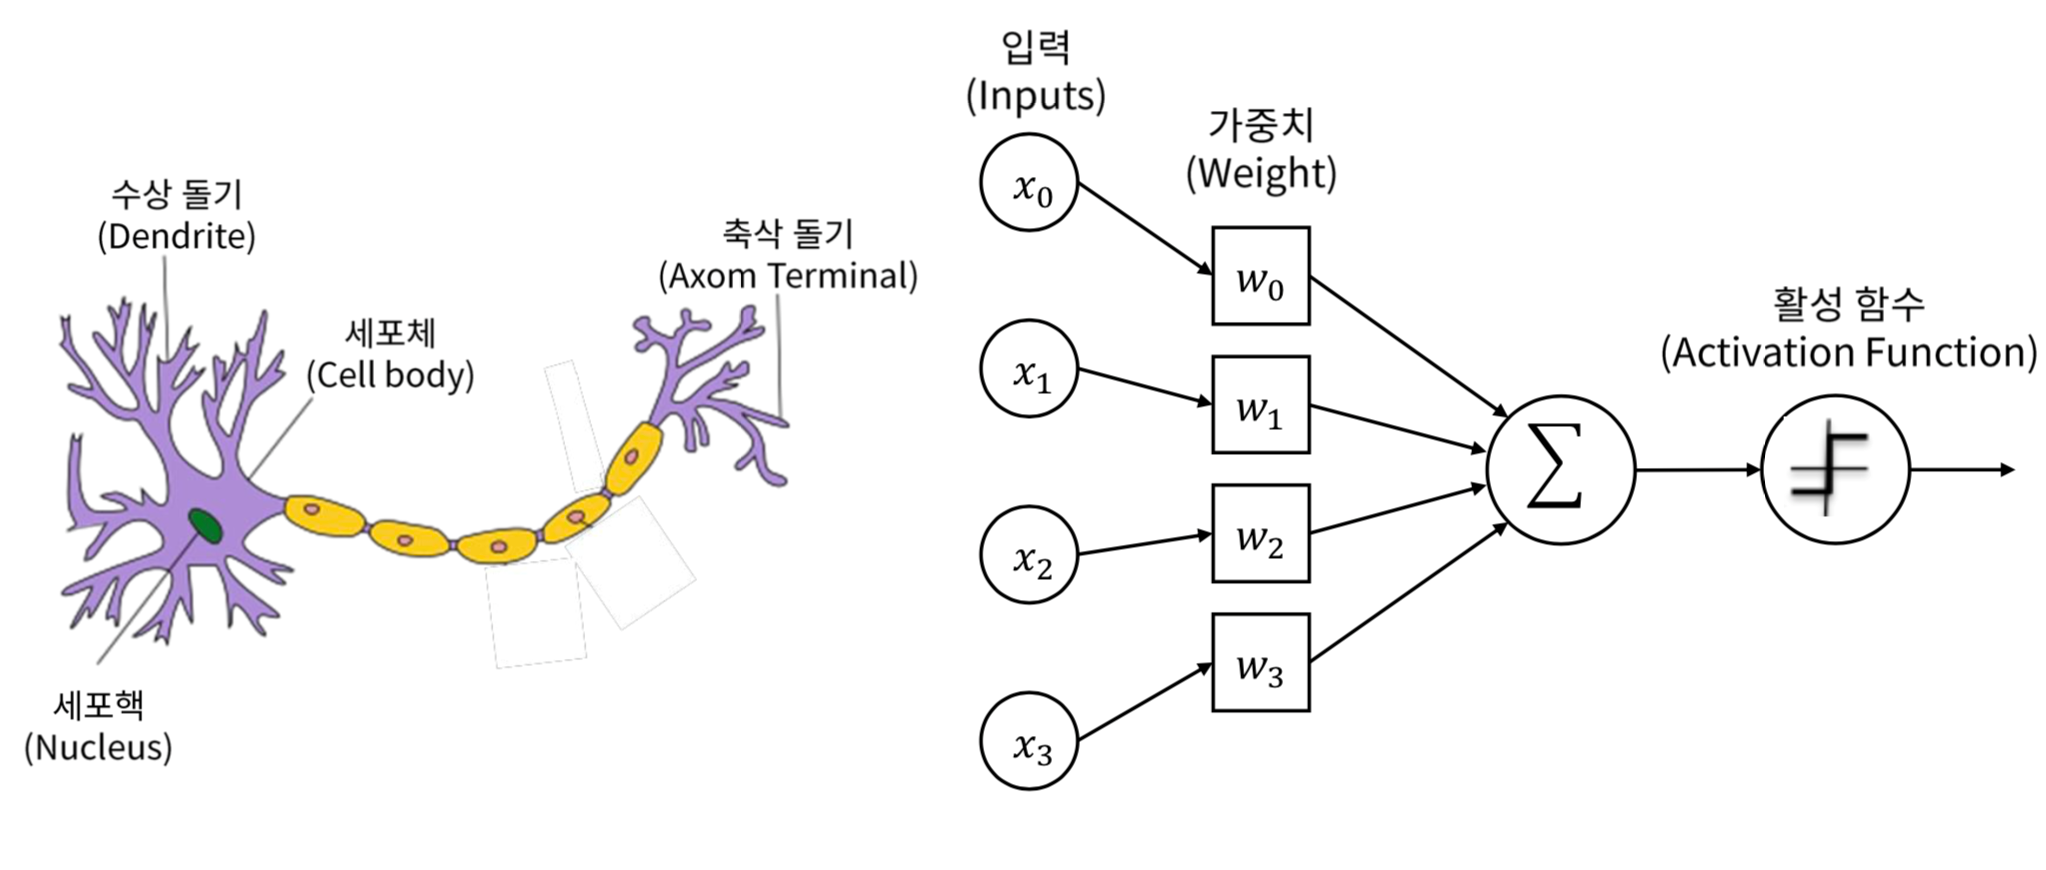

**단순한 논리 회로**

In [ ]:
# AND 게이트: 입력이 둘이고 출력은 하나입니다.
# 입력 신호와 출력 신호의 대응 표를 진리표라고 합니다.

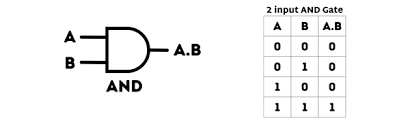

**NAD, OR 게이트**

In [ ]:
# NAD, OR 게이트
# 1) NAND 게이트: Not AND 게이트. -> AND 게이트의 출력을 뒤집은 것.
# AND 게이트를 구현하는 매개변수의 부호를 모두 반전하기만 하면 NAND 게이트가 됩니다.

# 2) OR 게이트: 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리 회로.

# 팔색조 배우가 다양한 인물을 연기하는 것처럼 똑같은 구조의 퍼셉트론의 값만 적절히 조정하여
# AND, NAND, OR로 변신하는 것입니다.

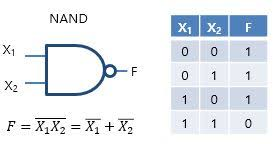

**퍼셉트론 구현하기**

In [2]:
# AND
def AND(x1, x2):
  w1, w2, theta=0.5, 0.5, 0.7
  tmp=x1*w1 + x2*w2
  if tmp <= theta:
    return 0
  elif tmp > theta:
    return 1
# 가중치를 곱한 입력의 총합이 임계값을 넘으면 1을 반환하고, 그 외에는 0을 반환합니다.

In [3]:
AND(0,0)
# 0*w1+0*w2=0<0.7: theta => 0

0

**가중치와 편향 도입**

In [6]:
# 퍼셉트론은 입력 신호에 가중치를 곱한 값과 편향을 합하여, 그 값이 0을 넘으면 1을 출력하고
# 그렇지 않으면 0을 출력합니다.

import numpy as np
x=np.array([0,1]) # 입력
w=np.array([0.5, 0.5]) # 가중치
b= -0.7 # 편향

print('w*x값:',w*x)
print('w*x+b값:',np.sum(w*x)+b)
# 0*0.5 + 1*0.5 + (-0.7) = -0.2

# 넘파이 배열끼리의 곱셈은 두 배열의 원소 수가 같다면 각 원소끼리 곱합니다.
# 그래서 이 예의 w*x에서는 인덱스가 같은 원소끼리 곱합니다.

w*x값: [0.  0.5]
w*x+b값: -0.19999999999999996


**가중치와 편향 구현하기**

In [9]:
# 가중치와 편향을 도입한 AND 게이트
def AND(x1, x2):
  x=np.array([x1, x2])
  w=np.array([0.5, 0.5])
  b=-0.7
  tmp=np.sum(w*x)+b

  if tmp <= 0:
    return 0
  else:
    return 1

In [11]:
# y=w1*x1+w2*x2+b
# w1, w2: 각 입력 신호가 결과에 영향력을 조절하는 매객변수
# b: 뉴런이 얼마나 쉽게 활성화하느냐를 조정하는 매개변수(편향)

In [10]:
# NAND
def NAND(x1, x2):
  x=np.array([x1, x2])
  w=np.array([-0.5, -0.5])
  b=0.7
  tmp=np.sum(x*w)+b

  if tmp <= 0:
    return 0
  else:
    return 1

def OR(x1, x2):
  x=np.array([x1, x2])
  w=np.array([0.5, 0.5])
  b=-0.2
  tmp=np.sum(x*w)+b

  if tmp<=0:
    return 0
  else:
    return 1

**퍼셉트론의 한계**

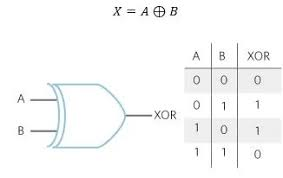

In [ ]:
# XOR 게이트: 배타적 논리합.
# x1과 x2 중 한쪽이 1일떄만 1을 출력합니다.
# 사실 지금까지 본 퍼셉트론으로는 이 XOR 게이트를 구현할 수 없습니다.

In [ ]:
# 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있습니다.
# 곡선의 영역: 비선형 영역
# 직선의 영역: 선형 영역

**다층 퍼셉트론이 출동한다면**

In [ ]:
# 기존 게이트 조합하기
# XOR 게이트를 만드는 방법은 다양합니다.
# 1) AND, NAND, OR 게이트를 조합하는 방법.

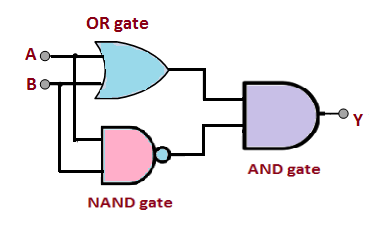

In [12]:
def XOR(x1, x2):
  s1=NAND(x1, x2)
  s2=OR(x1, x2)
  y=AND(s1, s2)
  return y

In [13]:
XOR(0,0)

0

In [14]:
XOR(0,1)

1

In [ ]:
# 2층 구조를 사용해 퍼셉트론으로 XOR 게이트를 구현할 수 있게 되었습니다.
# 다시 말해 단층 퍼셉트론으로는 표현하지 못한 것을 하나 늘려 구현할 수 있습니다.